# Test OCR

This is not really expected to produce usable output.

In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pytesseract import image_to_string
from ipywidgets import interact

In [2]:
DATA_DIR = Path('..') / 'data'
SHEET_FEED = DATA_DIR / 'old' / 'Sheetfeed'

IMAGE = str(SHEET_FEED / 'test0019.tif')

In [3]:
INCHES = 32


def show_image(image):

    fig, ax = plt.subplots(1, 1)

    ax.imshow(image, cmap='gray')
    ax.axis('off')

    fig.set_size_inches(INCHES, INCHES)
    plt.show()

In [4]:
gray = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

print(gray.shape)
# show_image(gray)

(3321, 4467)


In [5]:
ocr = image_to_string(gray, lang='eng', config='allometry.config')
print(ocr)

STA TFS TTC AL ANALY S TS SY S TEM 1

12221 WFONESDAY. DECEMBER 195 1979
OBS ID UF TFW SW WOV TRW USW DFW 9CW AGW ASTLOG BIOLG

V

1 DIDELPHIS MARSUST AL YF1I524 206590 0035750 C 2800 02182000 126139 B 37 16282 . .2Y

2 DIDFLOHIS MARSUPTAL UFIS79 309150 007250 622609 002227CO00 227030 7273 162389 13036 1212581 065927
3 DIDELPHIS MARSUPT AL UF1967 202320 923680 C 3826 2171000 1246190 6092 . O02 3769
4 DIDTLPHTS P PRANGE 323509 . . G 193009 . . . . 025250
5 DIDELPHIS MARSUPTAL PRANGE 209400 . C20185069 . . 024633
6 DIDELPHIS VIRGINIAN LSIL47 1.5300 G25 C 2690 G2075C09 0290698 . . . . 001987
7 DIDELPHIS VIRGINIAN LSU136 220860 623100 C21 7090 02112900 124940 . . 023193
8 INSECTI VORA PRANGE GCI 62 6 2000306 . . . . -222007
9 SYLVTLAGUS FLOPIDAN CUMBAA 122400 021256 922700 O02 061990 027849 . . 020934
10 SYLVILASGUS FLORITAN UF1634 021590 920190 600290 C 2593000 901139 412 . . . O407721
11 SYLVILAGJS FLORIDAN UF2166 161950 009745 901 84C 02585069 909530 S 32 . . O00 9774
12 SYLVILAGUS PALU

127


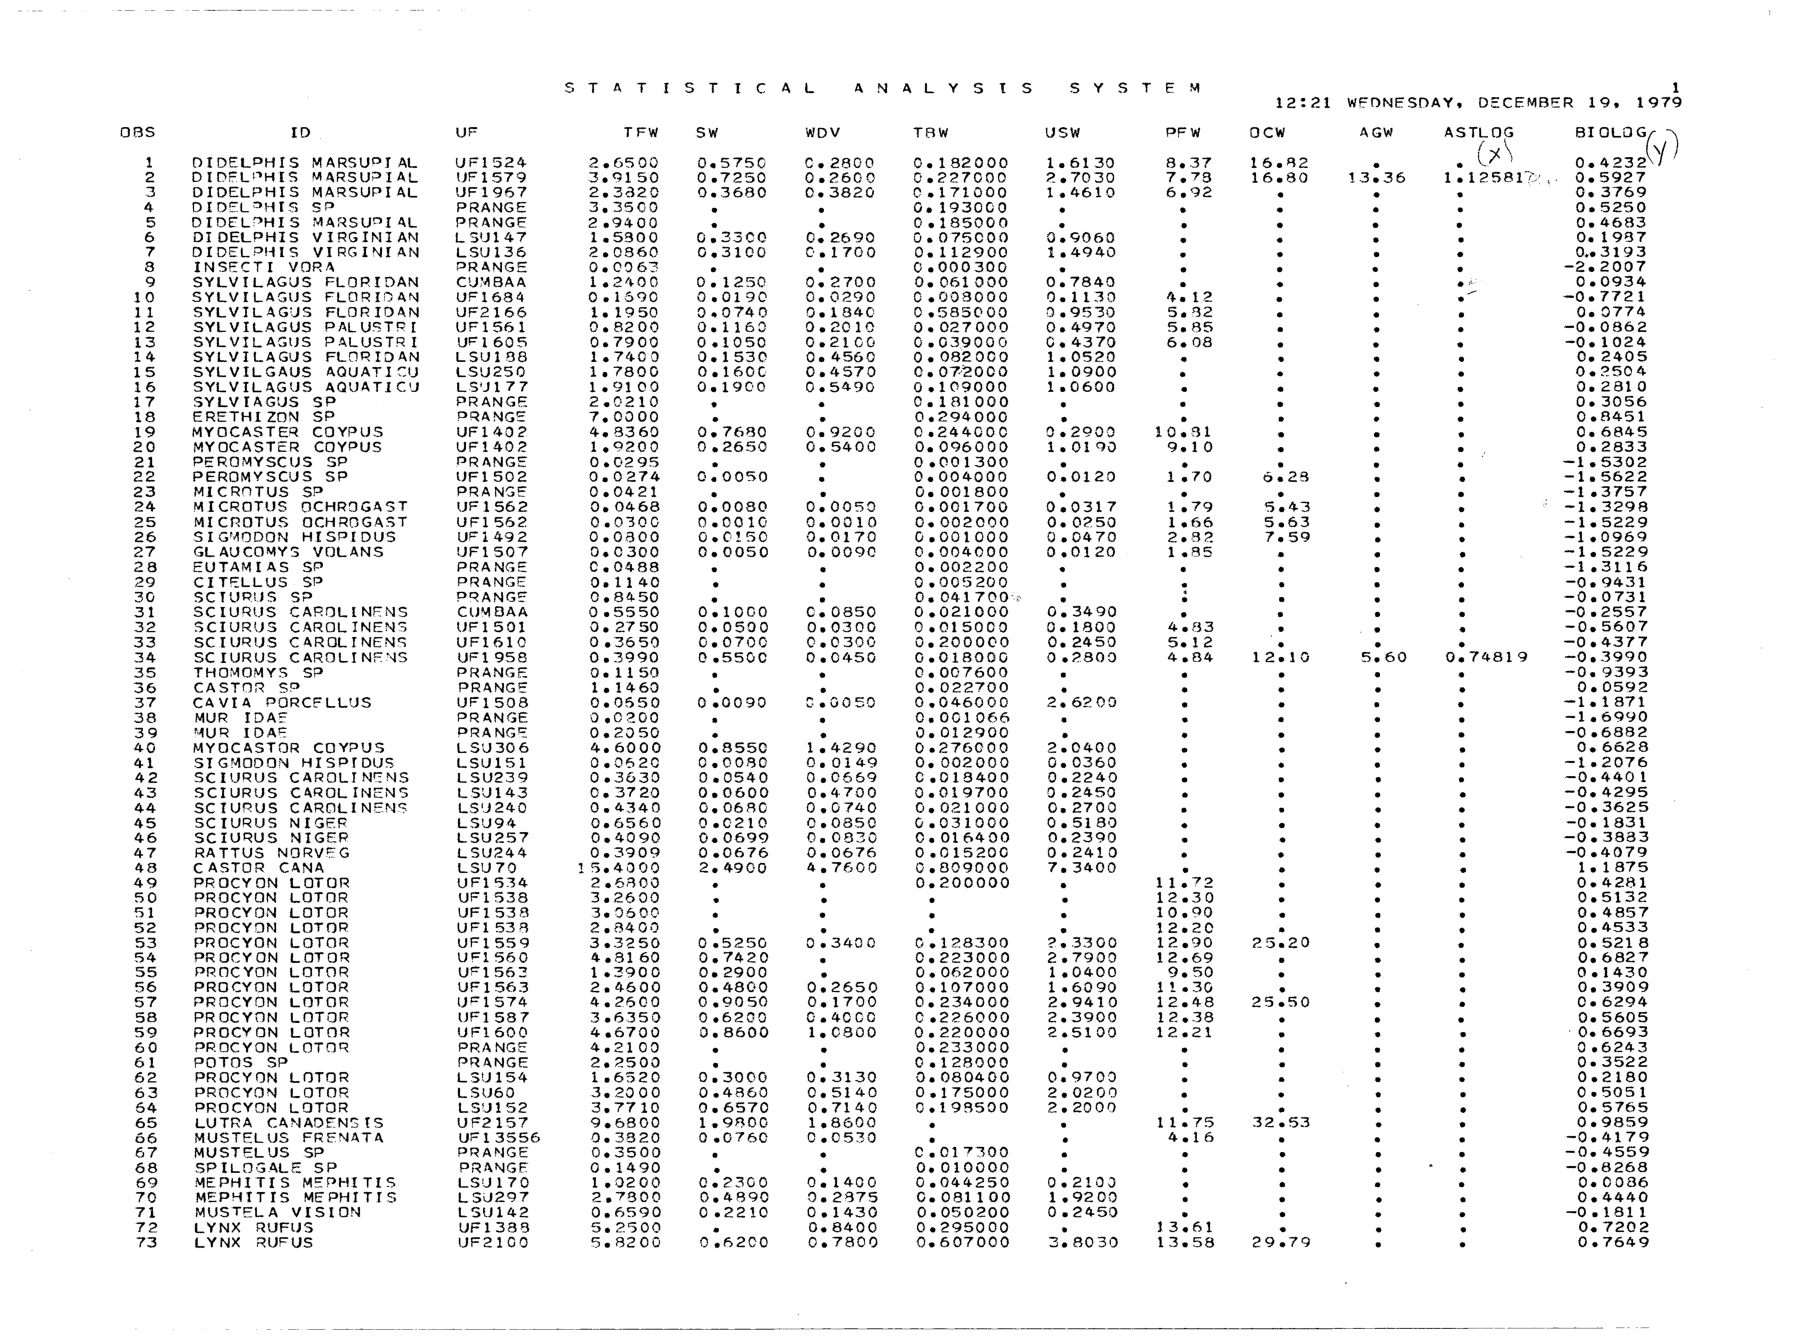

<function __main__.binarize(threshold)>

In [6]:
kernel = np.ones((4, 4), np.uint8)

binary = None


def binarize(threshold):
    global binary
    print(threshold)

#     binary = cv2.threshold(gray, 0, threshold, cv2.THRESH_BINARY)[1]
#     binary = cv2.threshold(
#         gray, 0, threshold,
#         cv2.THRESH_OTSU)[1]

    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

    show_image(binary)


interact(binarize, threshold=(0, 255))

In [8]:
ocr = image_to_string(binary, lang='eng', config='allometry.config')
print(ocr)

STATIS T TCAL ANALYST 5 SYS TEM 1
12221 WFONESDAY. DECEMBER 195. 1979

98S ID UF TFW SW WOV TBW USW PFW OC AGW ASTLOG

N

1 DIDELPHIS MARSUPT AL UF1524 206500 0.5750 C2 02182000 126130 8-37 16082 LA 024232
2 DIDFELPHIS MARSUPIAL UF 1579 329150 07250 022669 G2.227CG00 27030 7278 16280 13036 1212581 .. 065927
3 DIDELPHIS MARSUPTI AL UF1967 203320 9.3680 O02 3826 O2171500 124610 6292 . O 3769
4 DIDELPHTS SP PRANGE 3.3500 G2 193060 . . . . 025250
5 DIDELPHIS MARSUPT AL PRANGE 229400 . 02185000 . . . O 4683
6 DIDELPHIS VIRGINIAN LSUL47 1.25300 622500 G 2690 62075000 029060 . . 0.1987
7 DIDELPHIS VIRGINIAN LSU136 220869 043100 C217G0 02112900 124940 . 0.0 3193
3 INSECTE VORA PRANGE 040962 6 000300 2 . -222007
9 SYLVILAGUS FLORIDAN CUMBAA 162400 0.21250 022700 02 0619000 0.78490 020934
10 SYLVILAGUS FLORIDAN UF 1684 001590 920190 020290 C20983060 921130 42 7 O007721
1 SYLVILAGUS FLORIDAN UF2166 101950 0.0740 9 840 0 05850090 929539 5.32 . . 0 0774
12 SYLVILAGUS PALUSTESI UF1S561 0.8200 001160

In [9]:
canny = cv2.Canny(binary, 60, 300)  
canny = cv2.bitwise_not(canny)
# show_image(canny)

In [10]:
ocr = image_to_string(canny, lang='eng', config='allometry.config')
print(ocr)

 

 

STAT FI SF TC AL AN ALY S  S SY S YE M
L282L WEDNESDAY. DECEMBER 195 1979

BBS D . UF TEW SW WOV THAW USW PF W QCW AGW AST OS

FP

OLDELPHIS MARSUST AL UFPIS24 206508 O05 75G G 2800 GB2000 L GL 30 B03F7 LS0G82 0042320
2 OLOPLEPATS MARSUPTAL UF L S79 3091 50 0 07V7 250 O02869 C0227GO0O 20G30 V0 8 16080 13036 L2SOVE:.. O0S927
3 OXLDELPALS MARSYUP IT AL UYEIOS7 2033826 903680 G0 3826 GVLCSO 104619 6092 9 O 3 O 3769
PL DELEHTS SP PRANGE 3038560 O O G 1V936G6O O O 008250
5S OIDELPHIS MARSUPLAL PRANGE 209406 O G1BSOOO Q 4683
6 DI DELPAHLS VIRGIN AN LSULT 1 1 5800 6033560 C 2690 G6. O7SC09 90 9O60 O O LOBY
V OLDELPHIS YIRGINYE AN LSUL3S6E 200860 G631C60 G7O0 OL L290 E049 4O0 O 2 3 O O.0 3193
8 INSECTEL VORA PRANGE O0COD 6S Q Q 6.009306 2 O O O 202007
9 SYLYYLAGUS FLOR LOAN CUM BAA L 200 O2Z25E 00 2700 O O61 ADO O00 7B4O O 2 O O OO934
10 SYLVILAGUS FLORIS AN UP L684 G6 01896 000198 G0 8290 61898066 DJLI SO B2 O Q O7 O07721
SYLVILAGUS FLOR IDAN UF2Z166 L 1950 00874 B B4EO 6 6 S85SG09 9098